# Figure 6f-g Curved-path implantation

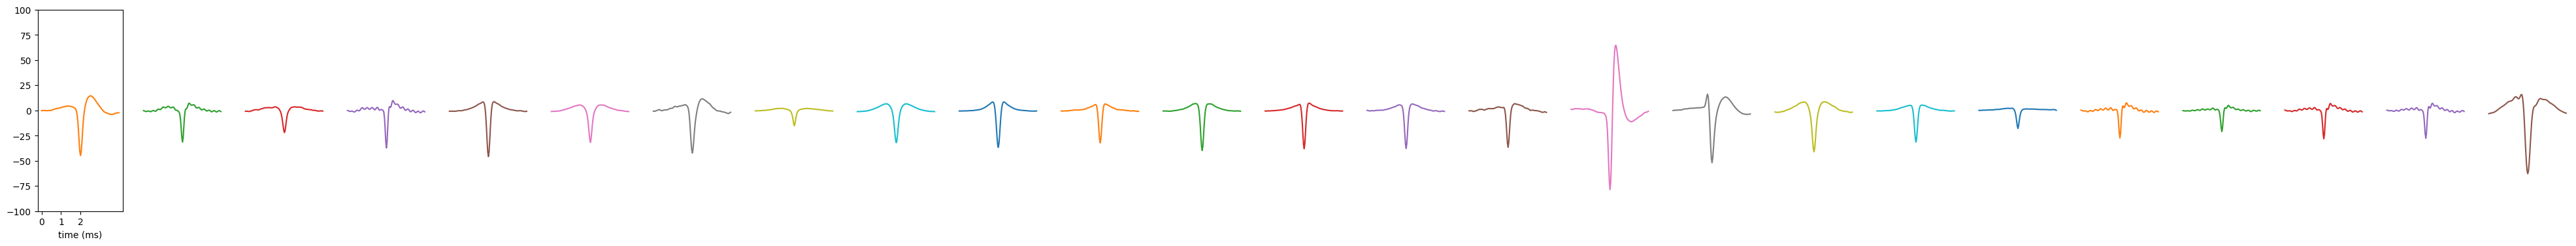

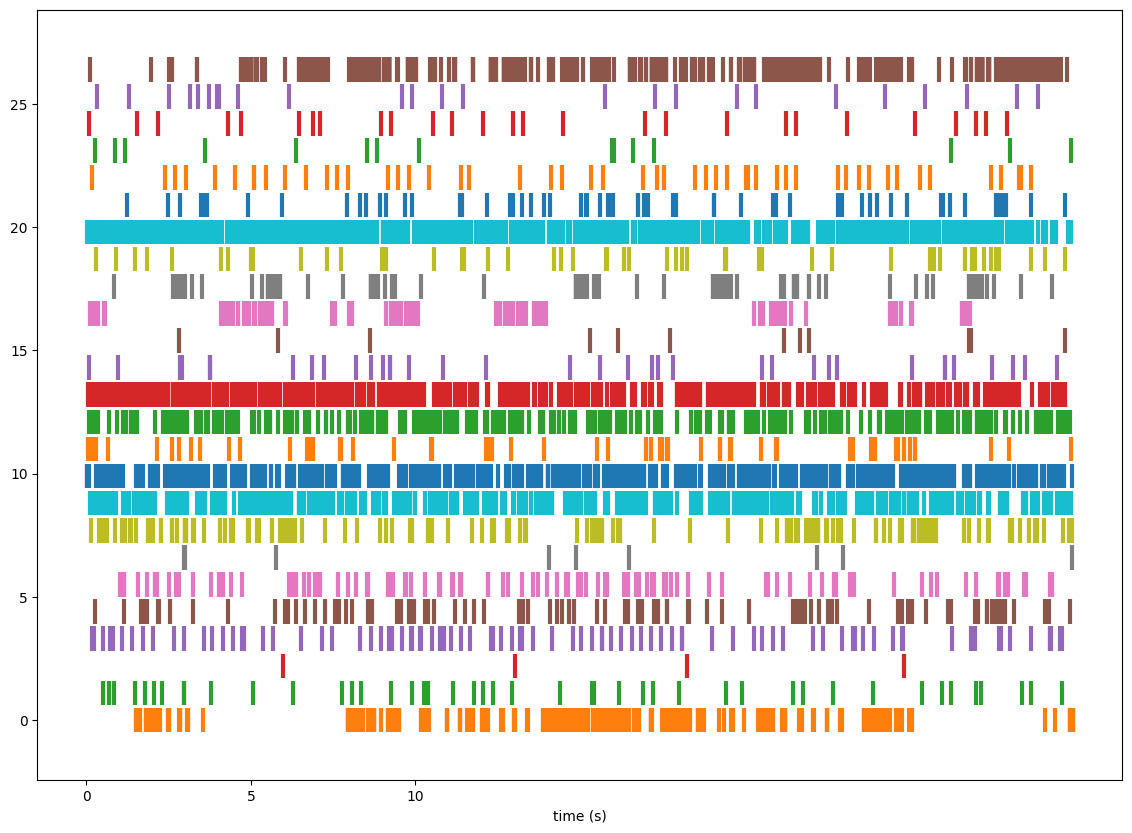

 Successfully reloaded NPZ data and redrew all figures!


In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import os

source_data_dir = "../Source data/Figure 6"
# Load the saved NPZ file
data = np.load(os.path.join(source_data_dir, "figure6f_data.npz"), allow_pickle=True)

templates = data["templates"]
events = data["events"]
template_colors = data["template_colors"]
event_colors = data["event_colors"]
sampling_frequency = data["sampling_frequency"].item()
n_frames_per_ms = data["n_frames_per_ms"].item()

# **Replot Templates**
plt.figure(figsize=(len(templates) * 2, 4))
for plot_index, template in enumerate(templates):
    ax = plt.subplot(1, len(templates), plot_index + 1)
    ax.plot(template, color=template_colors[plot_index])
    if plot_index != 0:
        ax.set_axis_off()
    ax.set_xticks([0, n_frames_per_ms, n_frames_per_ms * 2], [0, 1, 2])
    ax.set_xlabel('time (ms)')
    ax.set_ylim(-100, 100)
plt.savefig(f'{source_data_dir}/templates_redrawn.pdf')
plt.show()
plt.close()

# **Raster Plot**
plt.figure(figsize=(14, 10))
plt.eventplot(events, colors=event_colors, linewidths=3, lineoffsets=1.1)
plt.xticks([0, sampling_frequency * 5, sampling_frequency * 10], [0, 5, 10])
plt.xlabel('time (s)')
# plt.savefig(f'{source_data_dir}/raster_redrawn.pdf')
plt.show()
plt.close()

print(" Successfully reloaded NPZ data and redrew all figures!")

# Figure 6l-n Deep region implantation

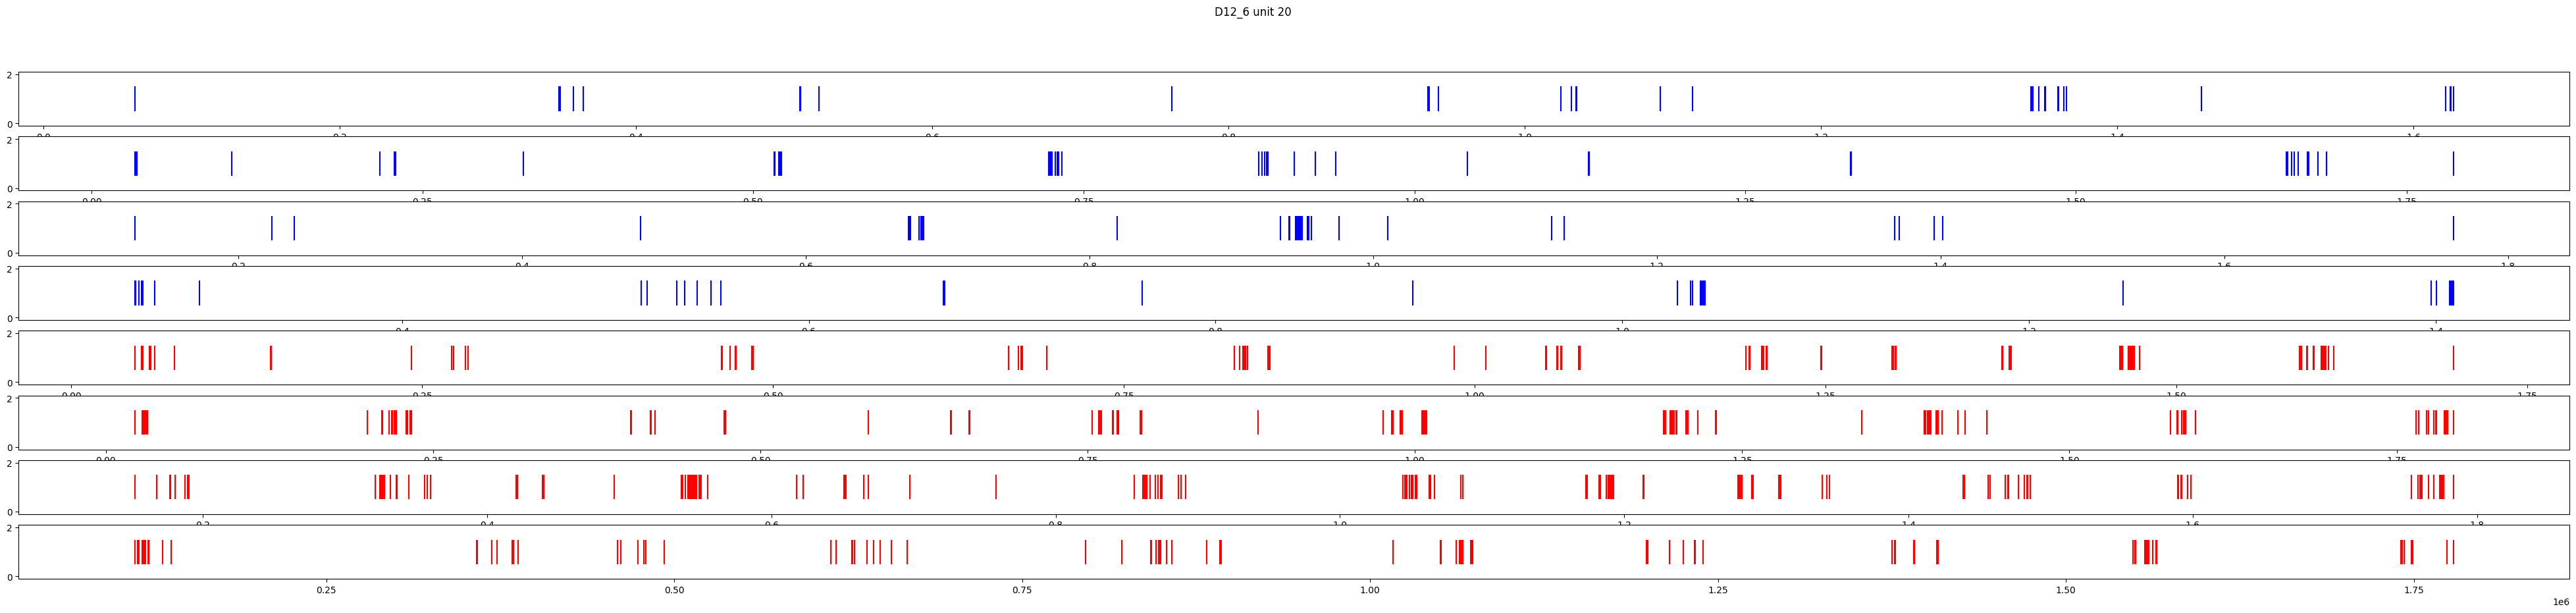

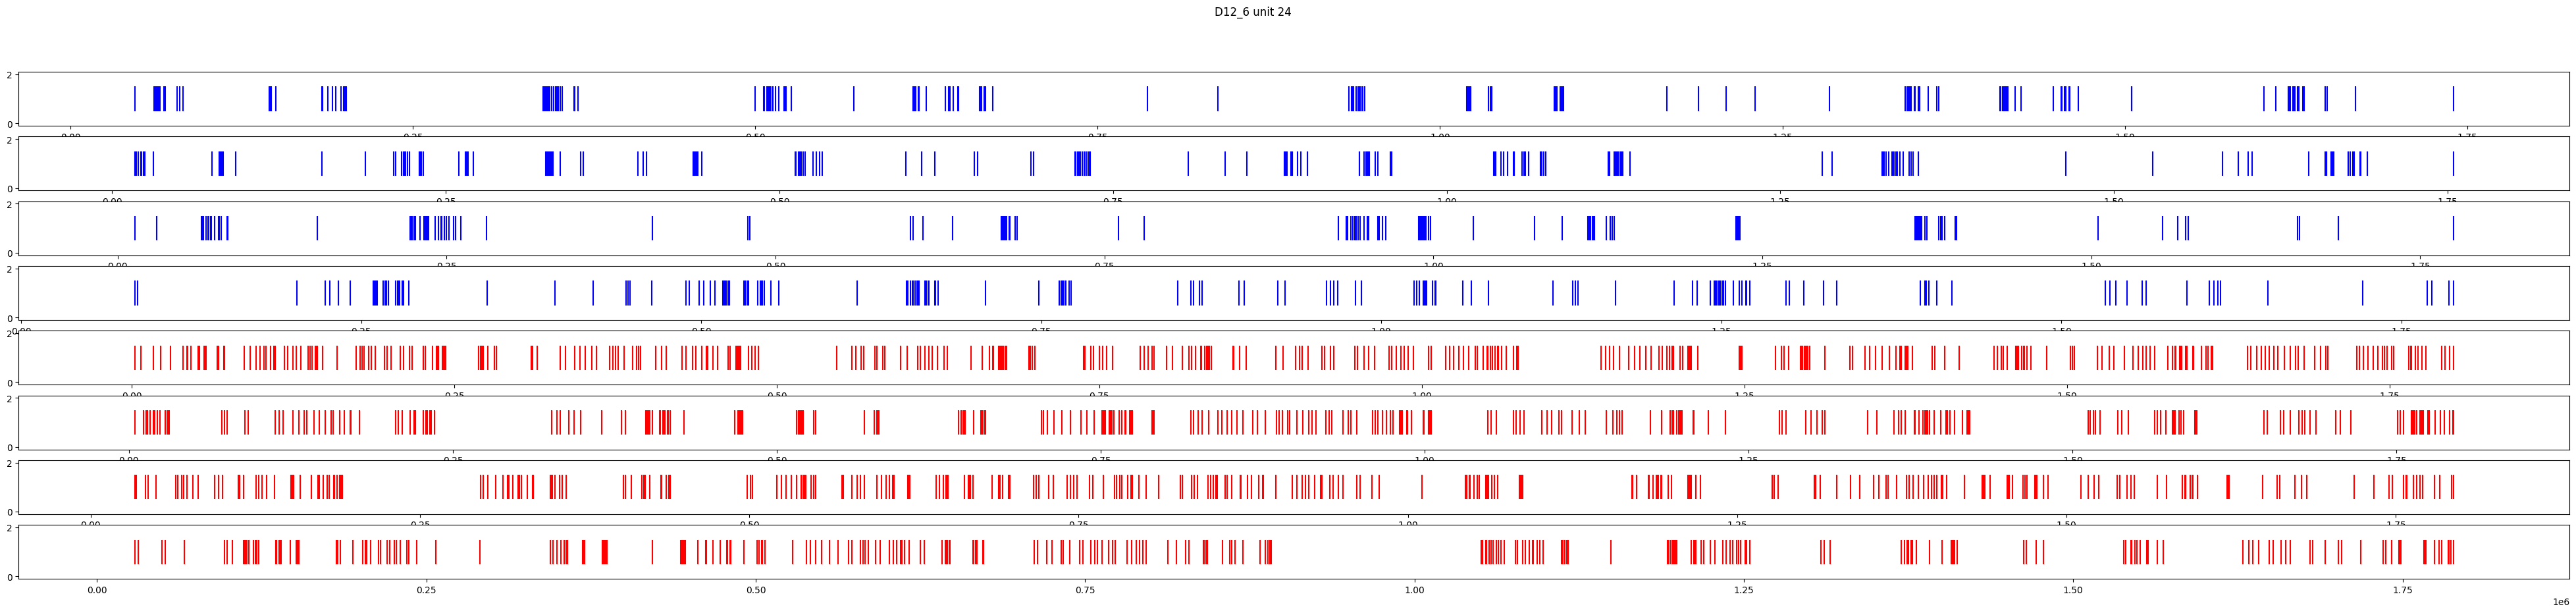

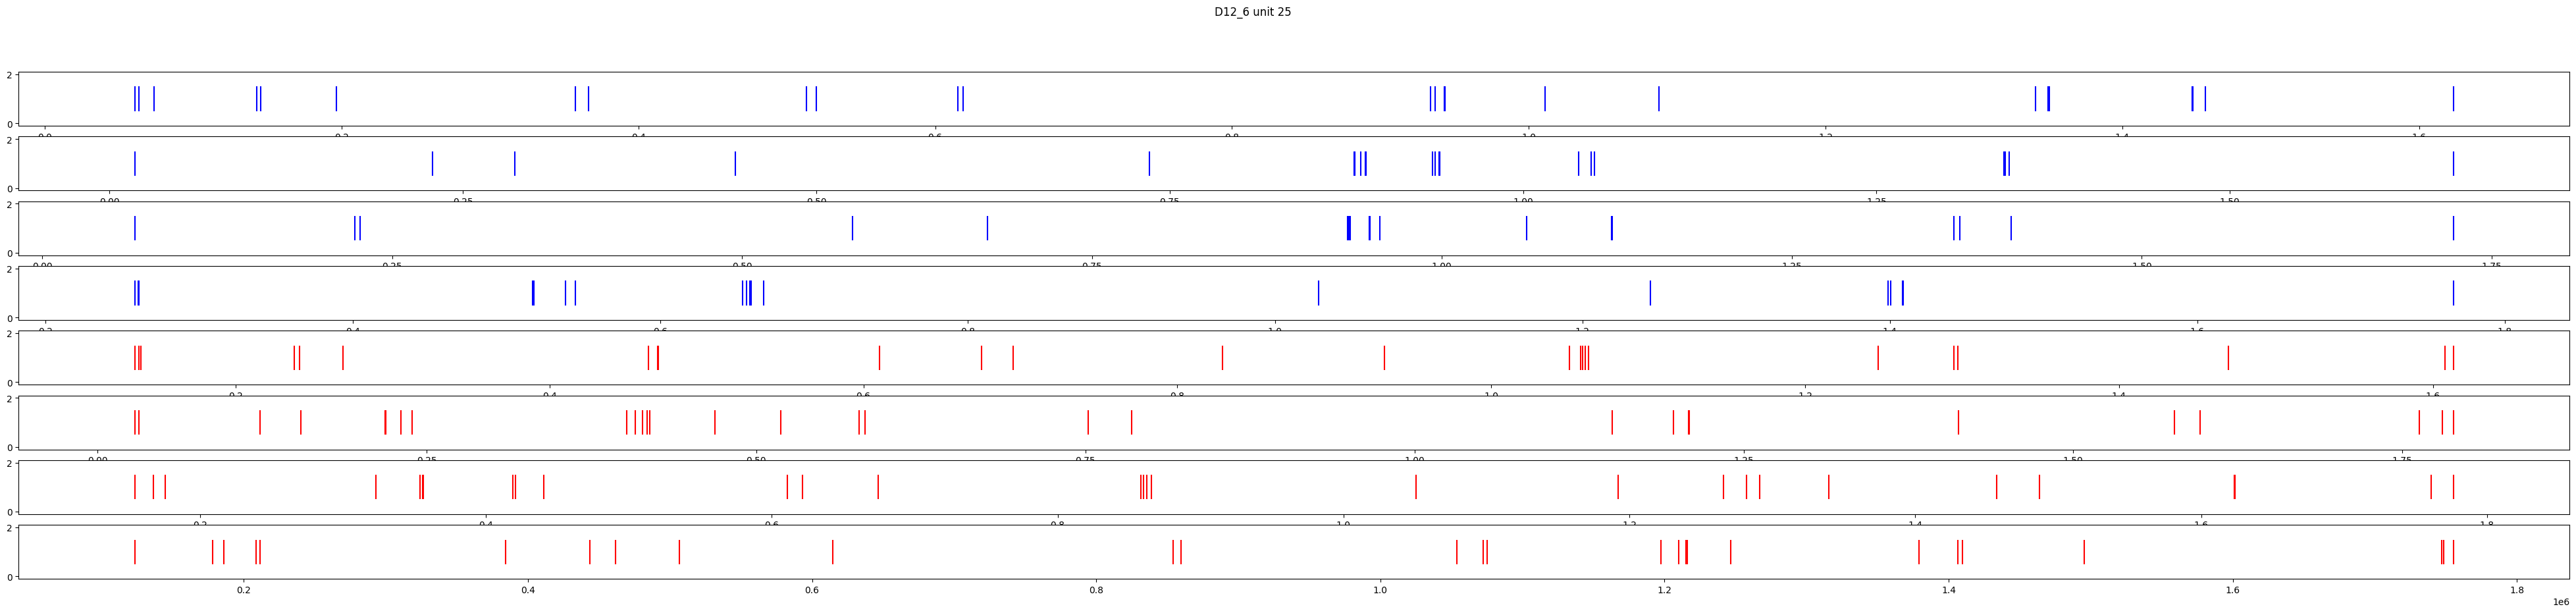

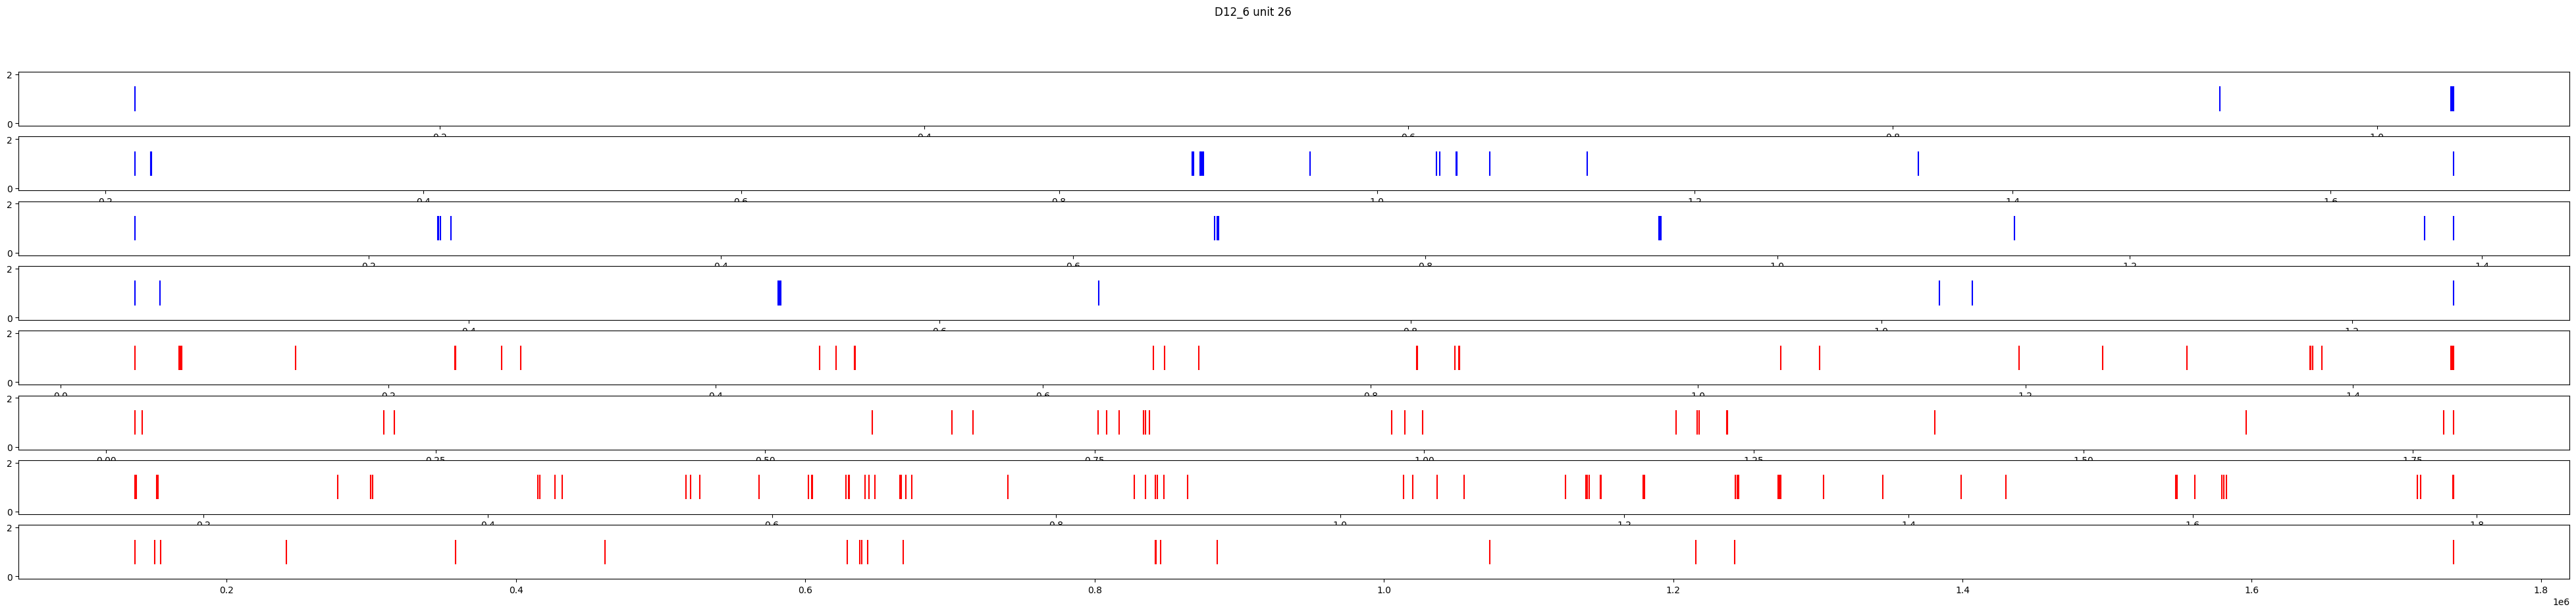

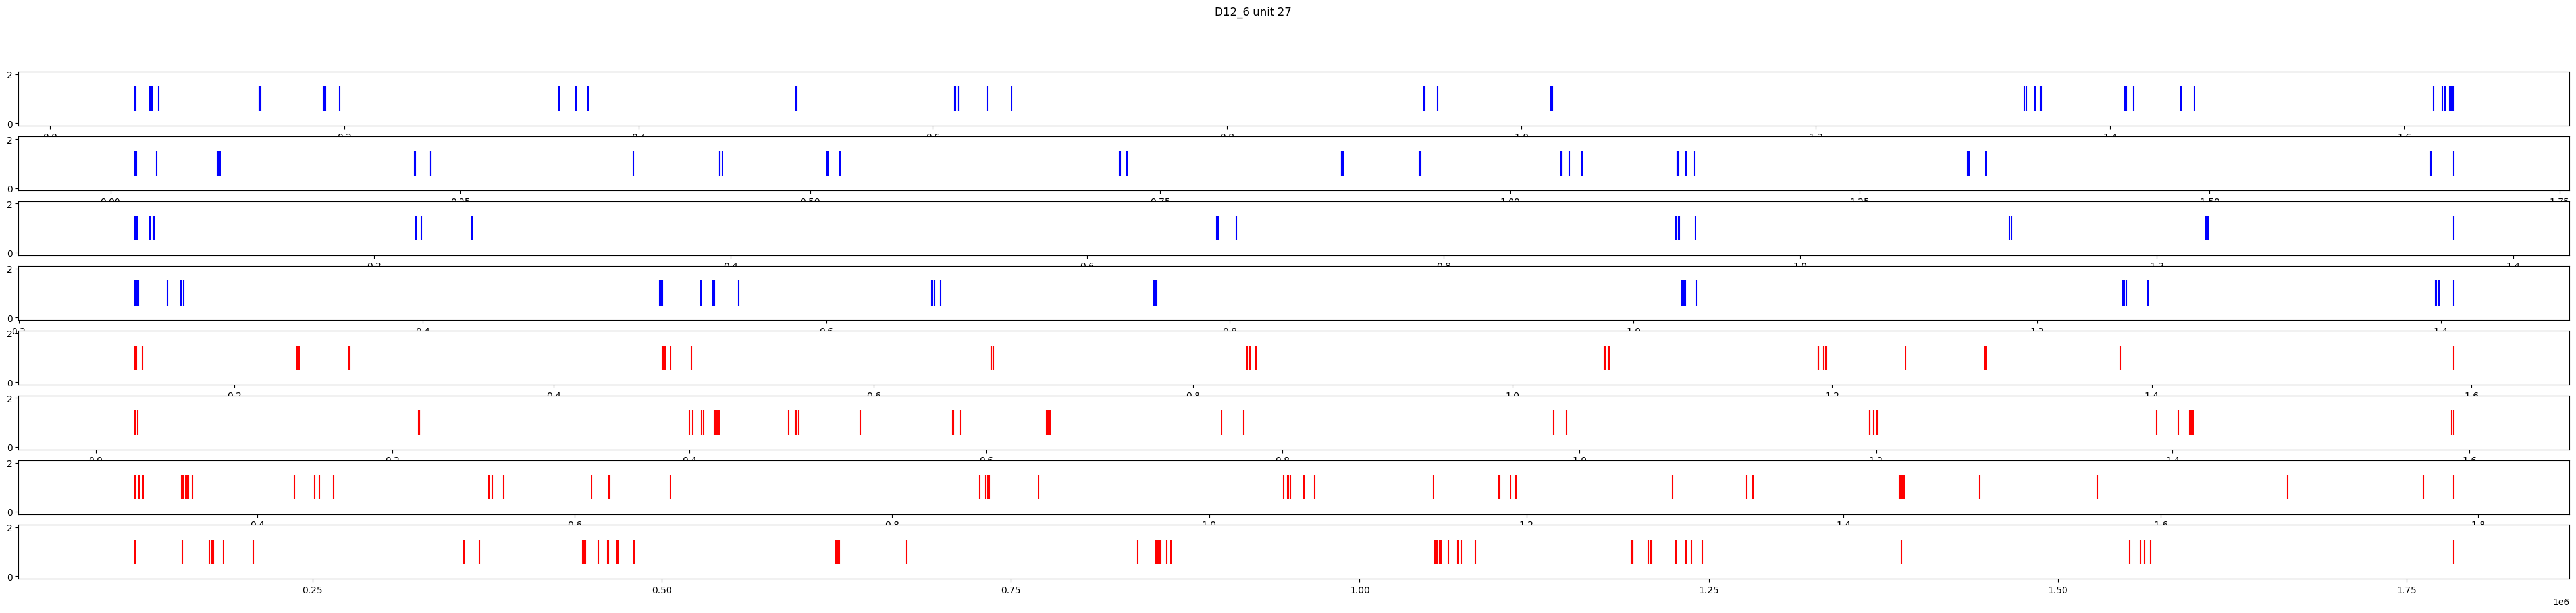

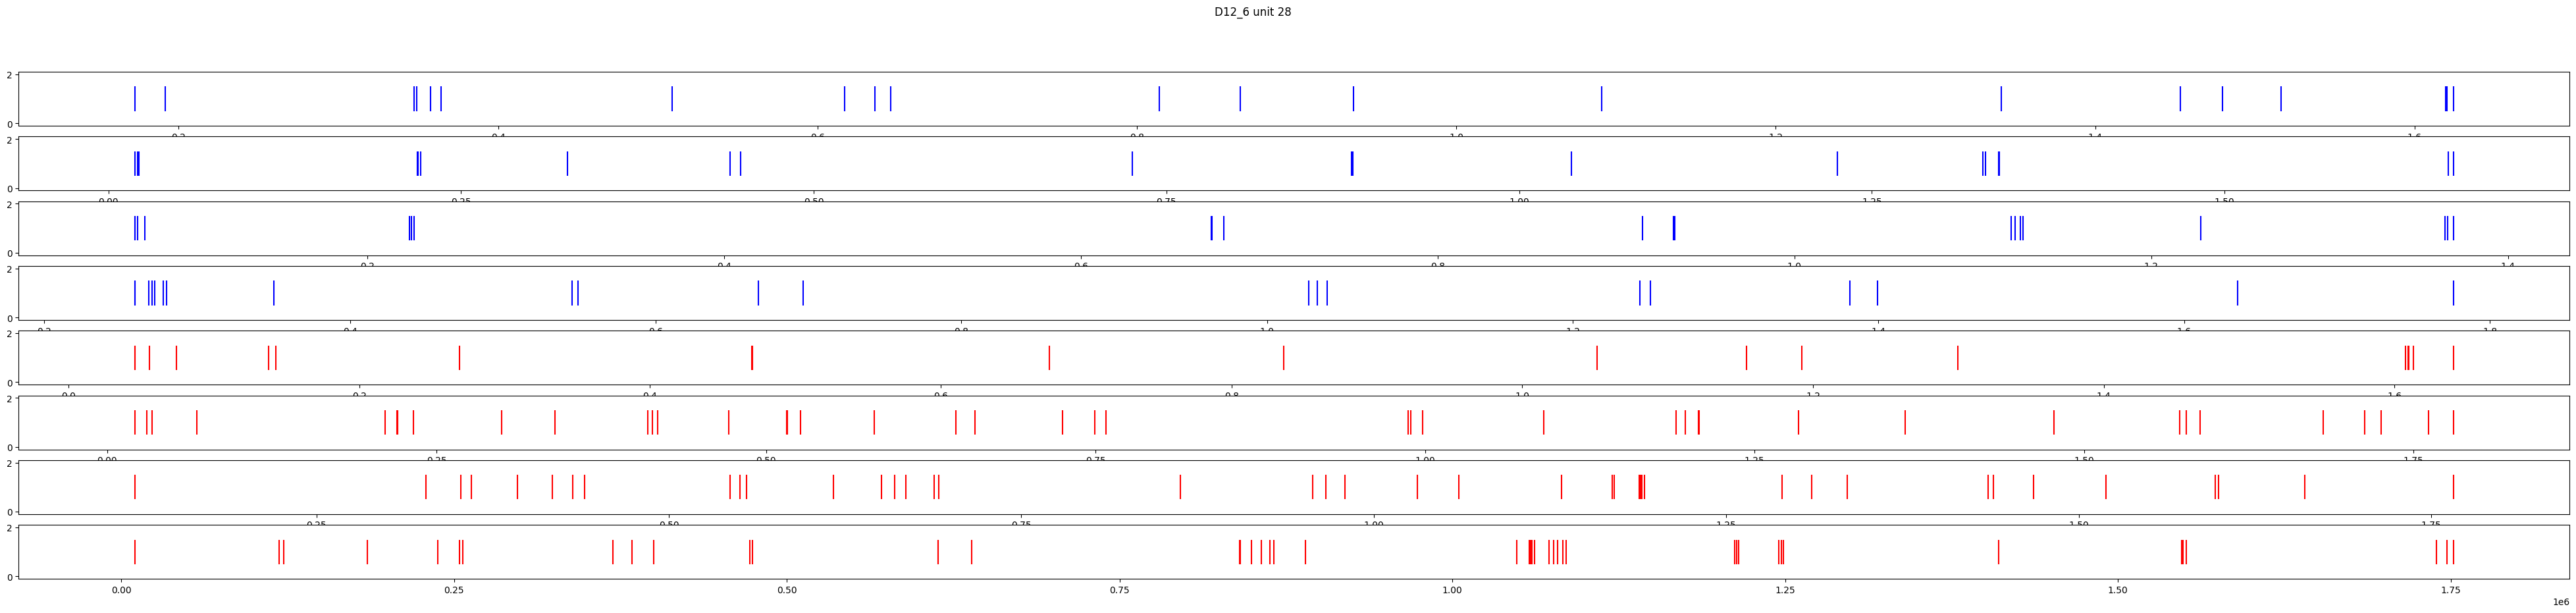

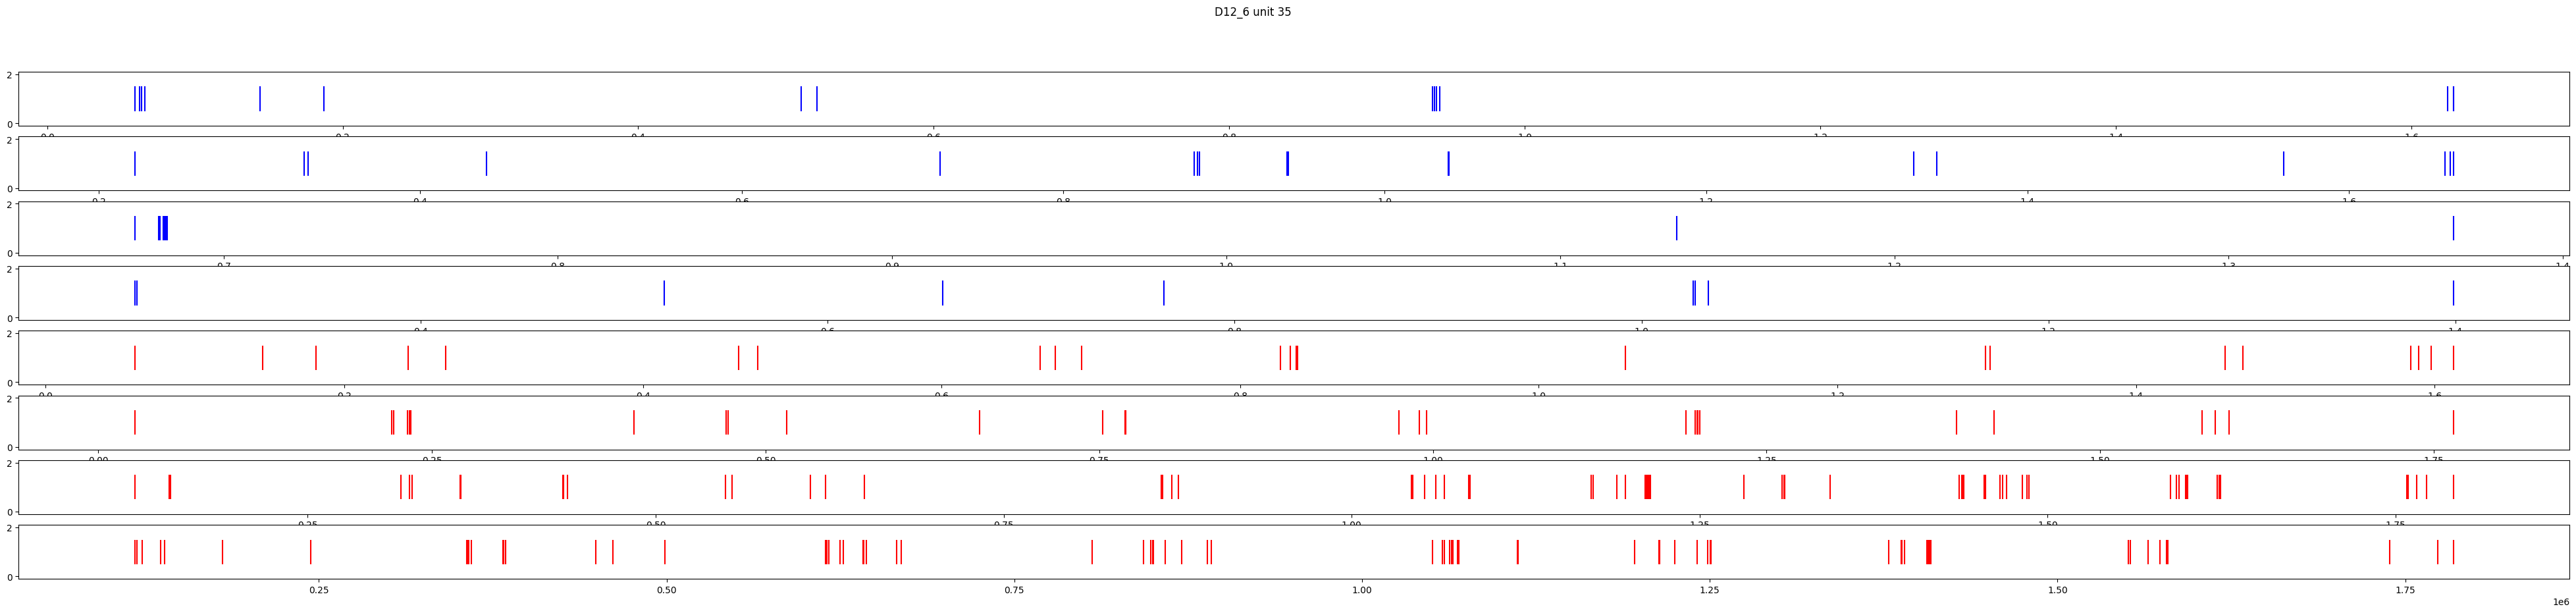

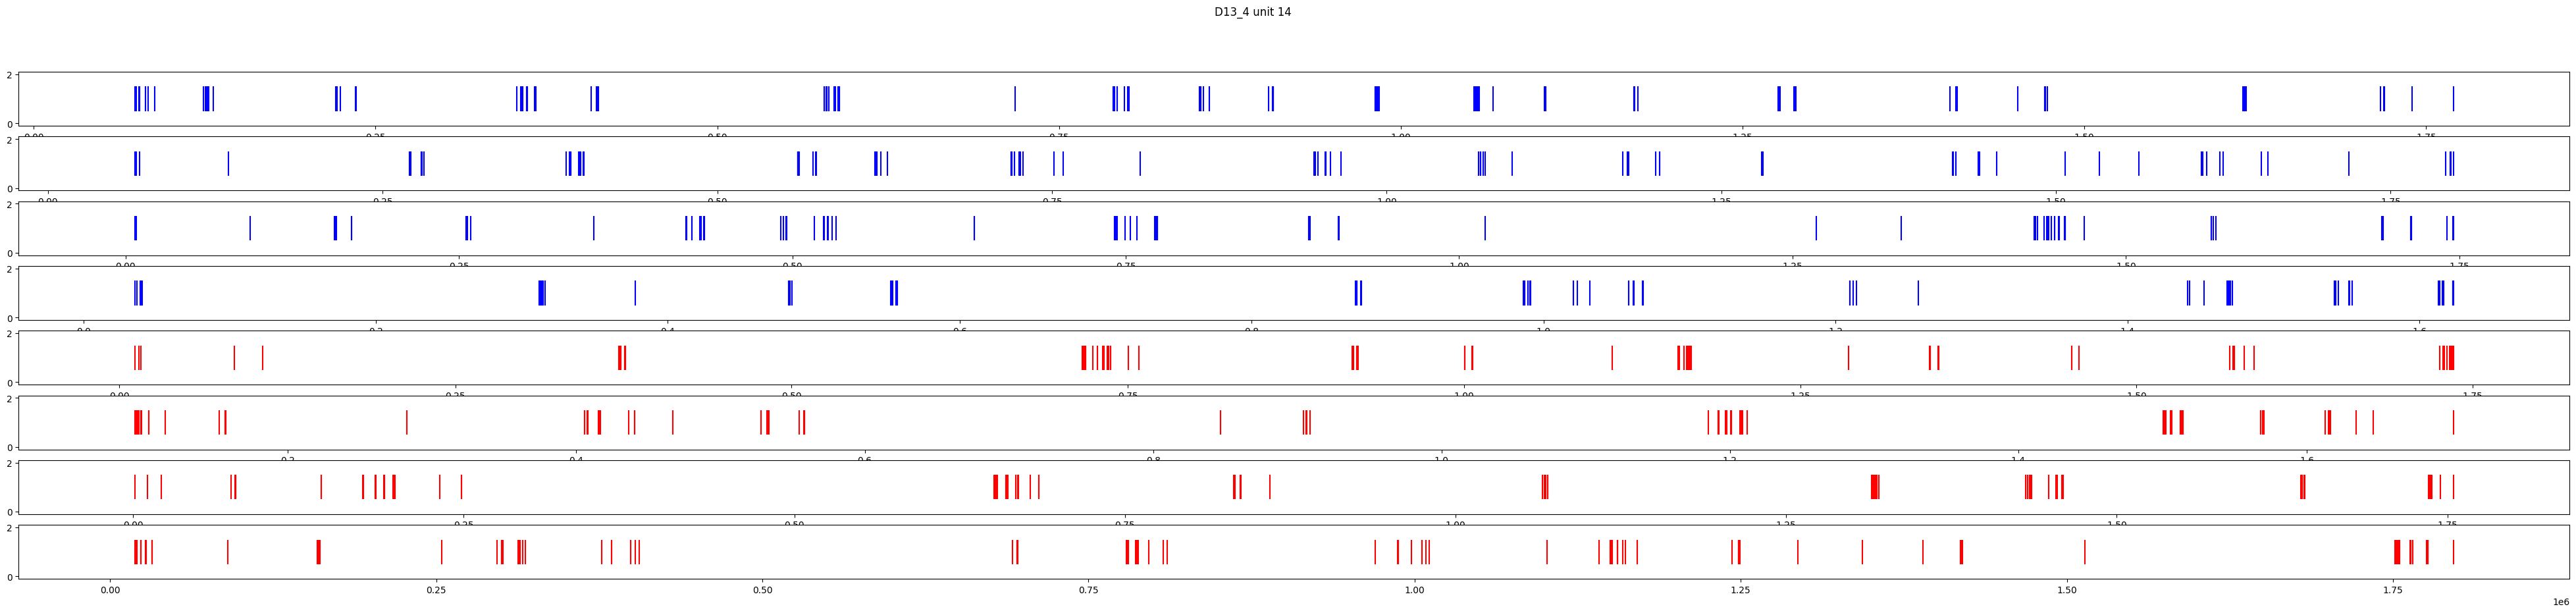

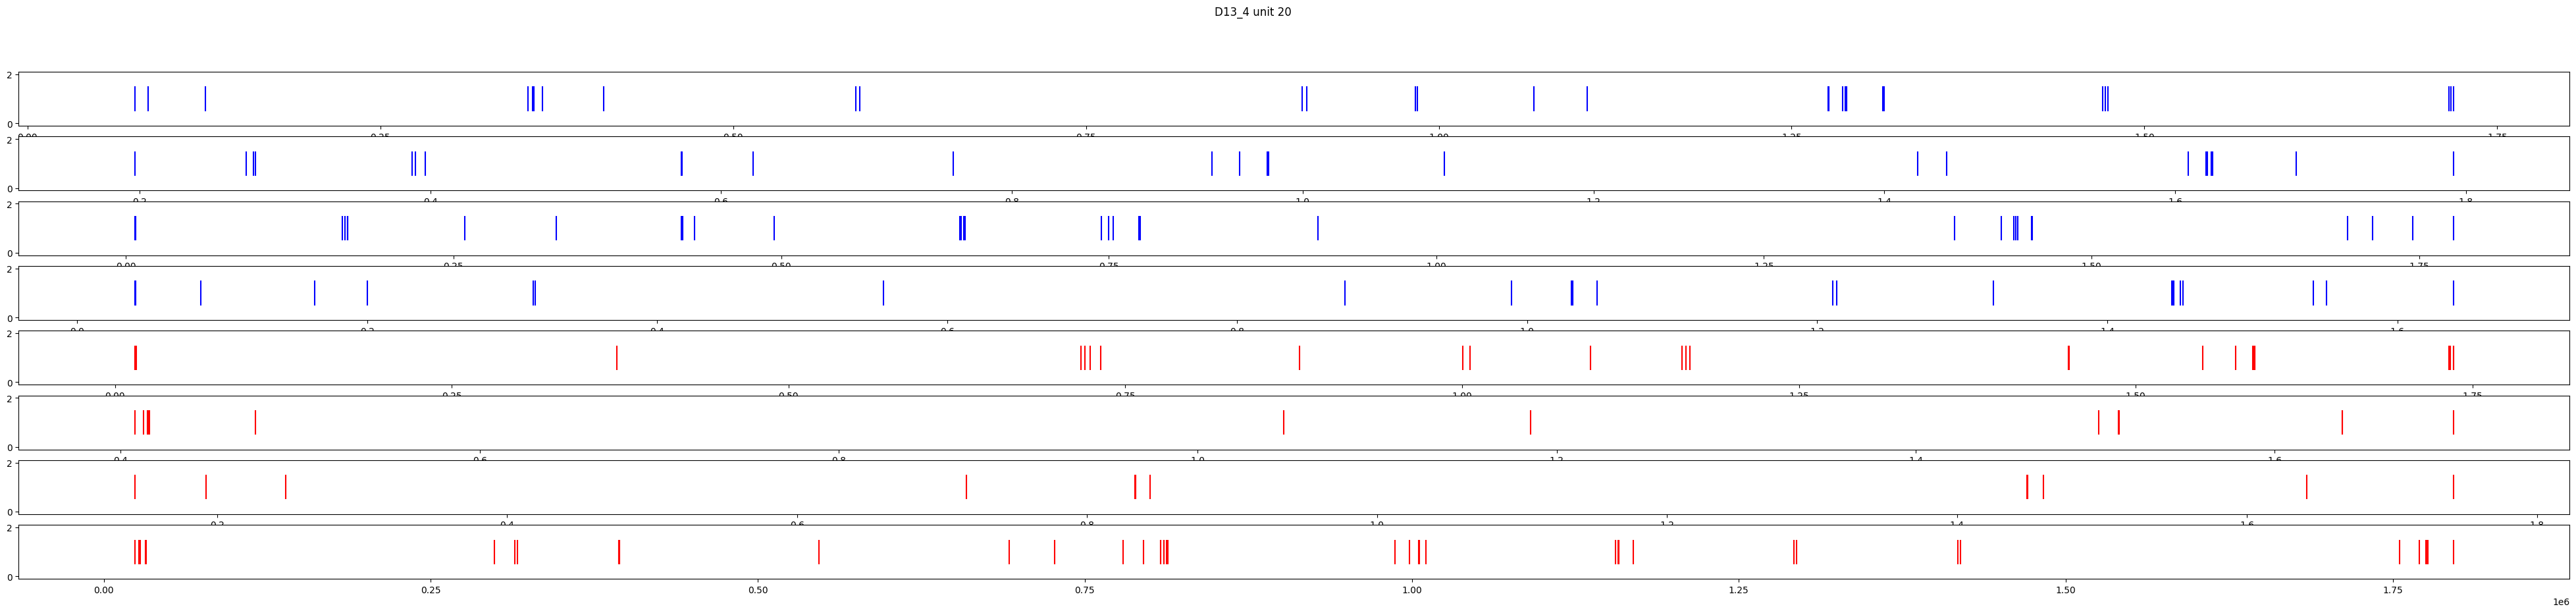

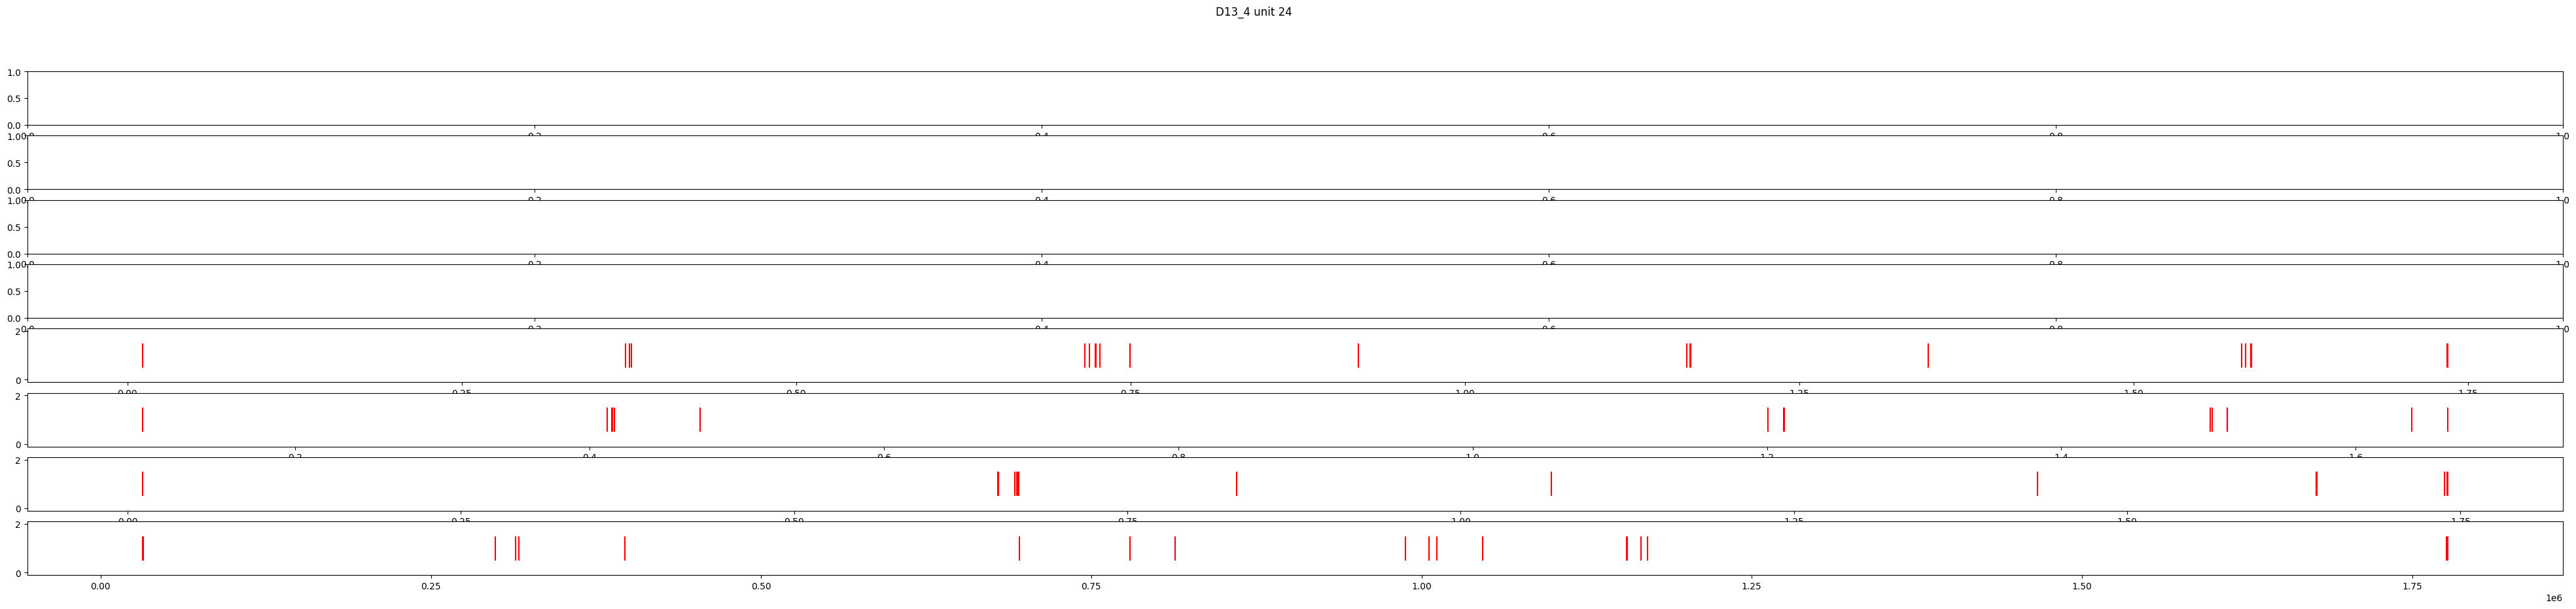

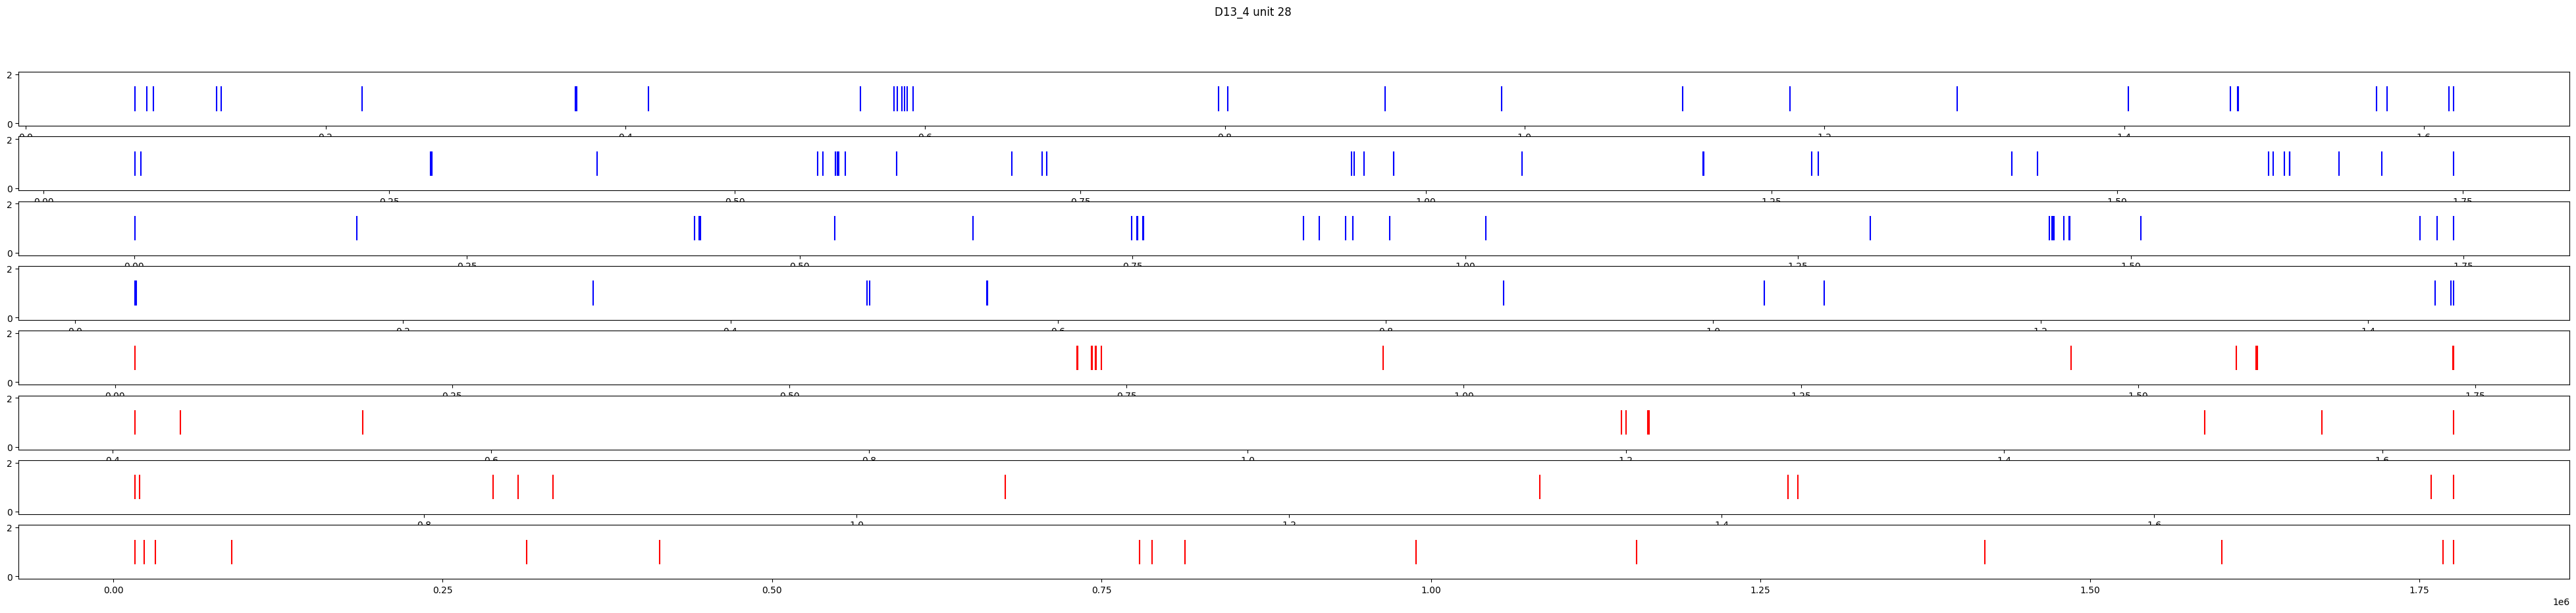

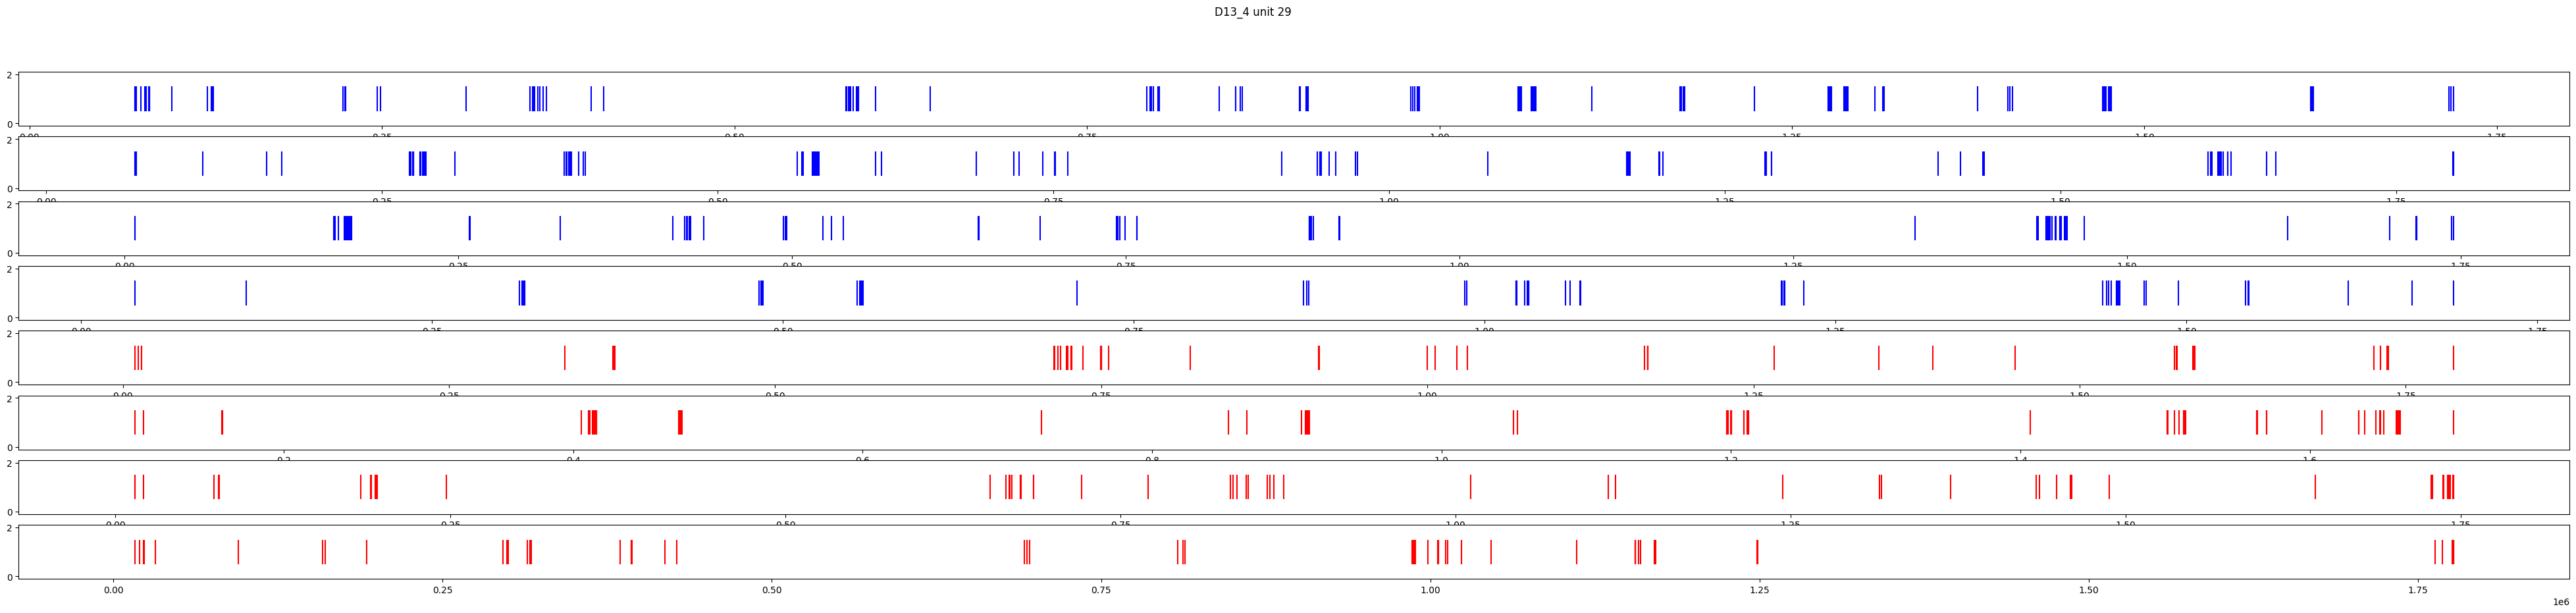

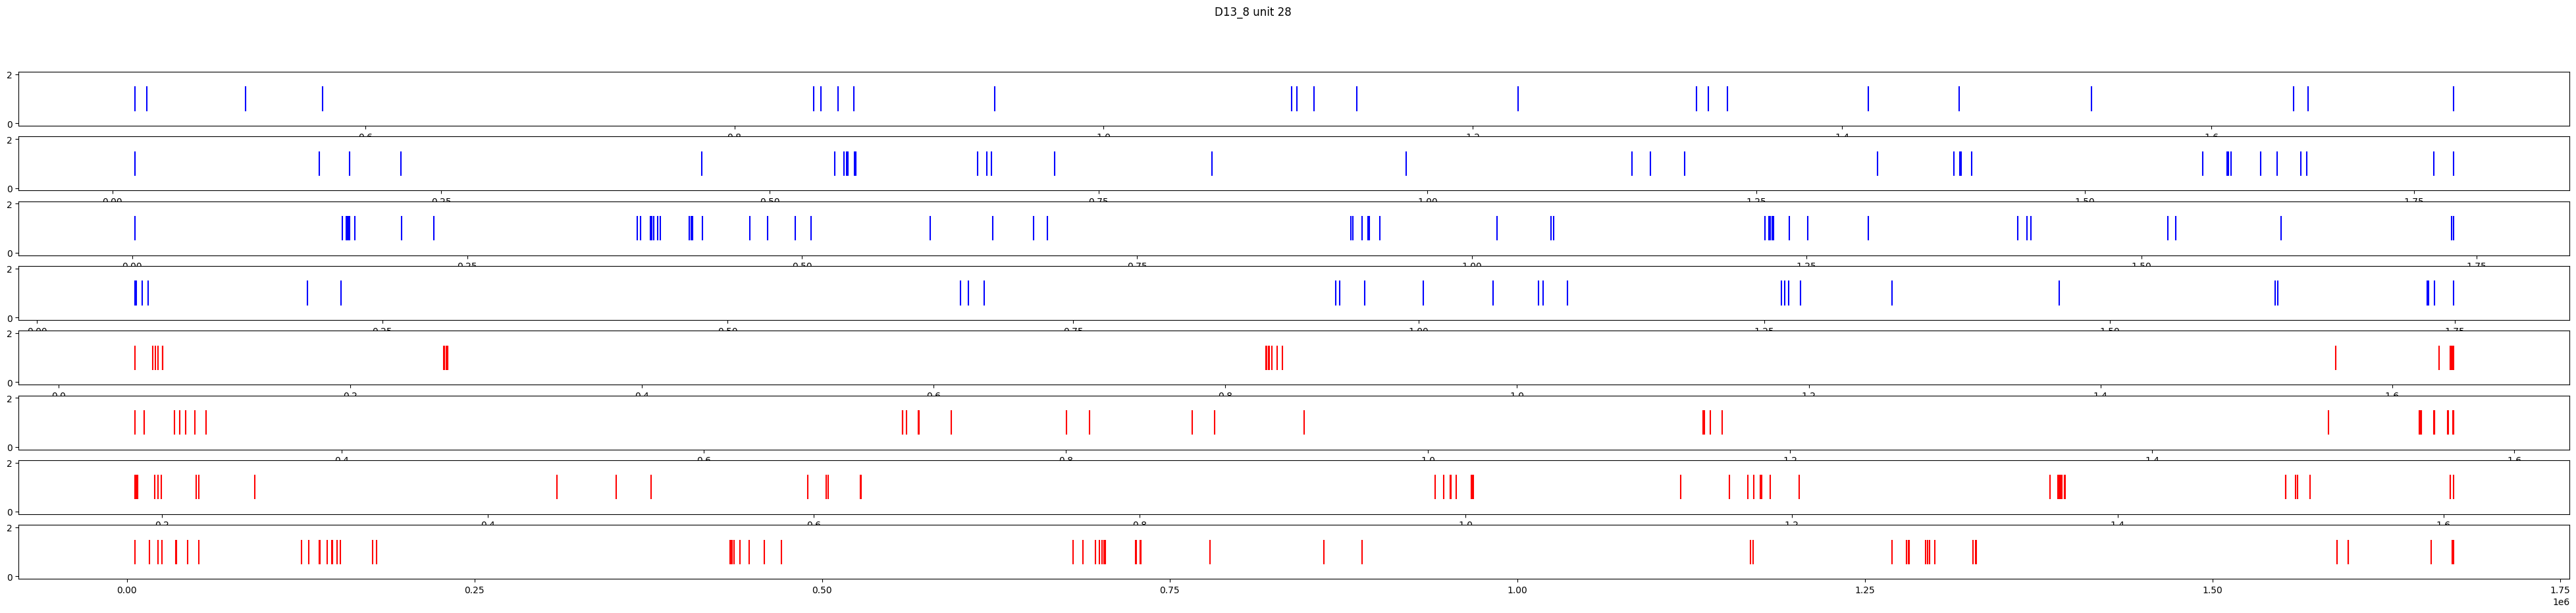

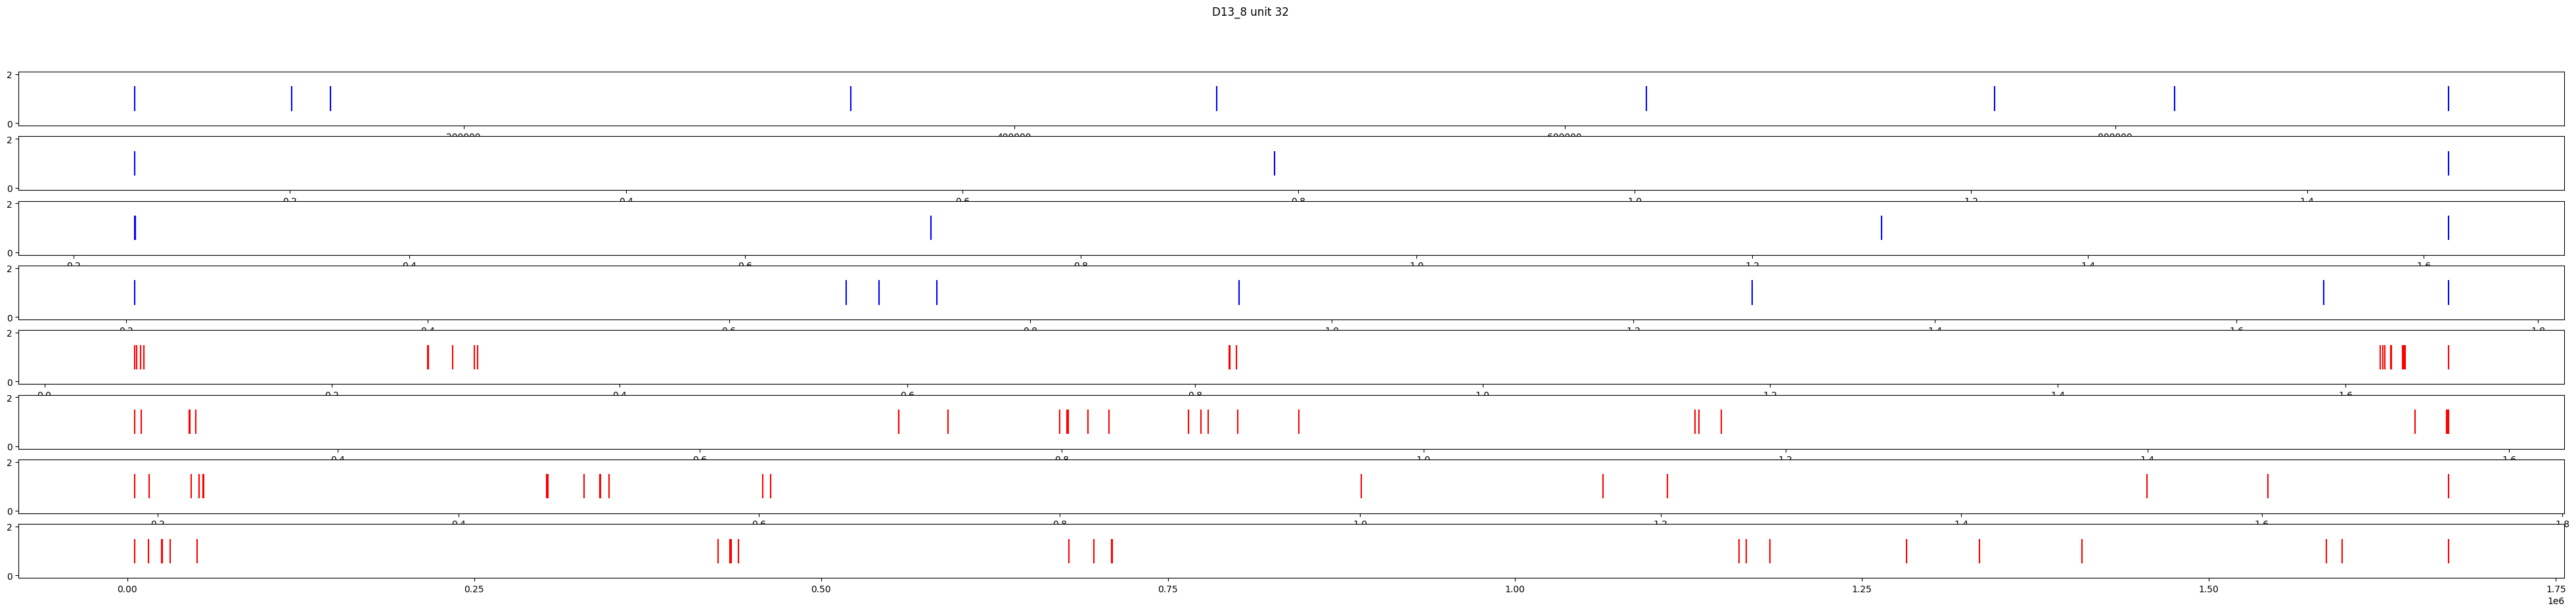

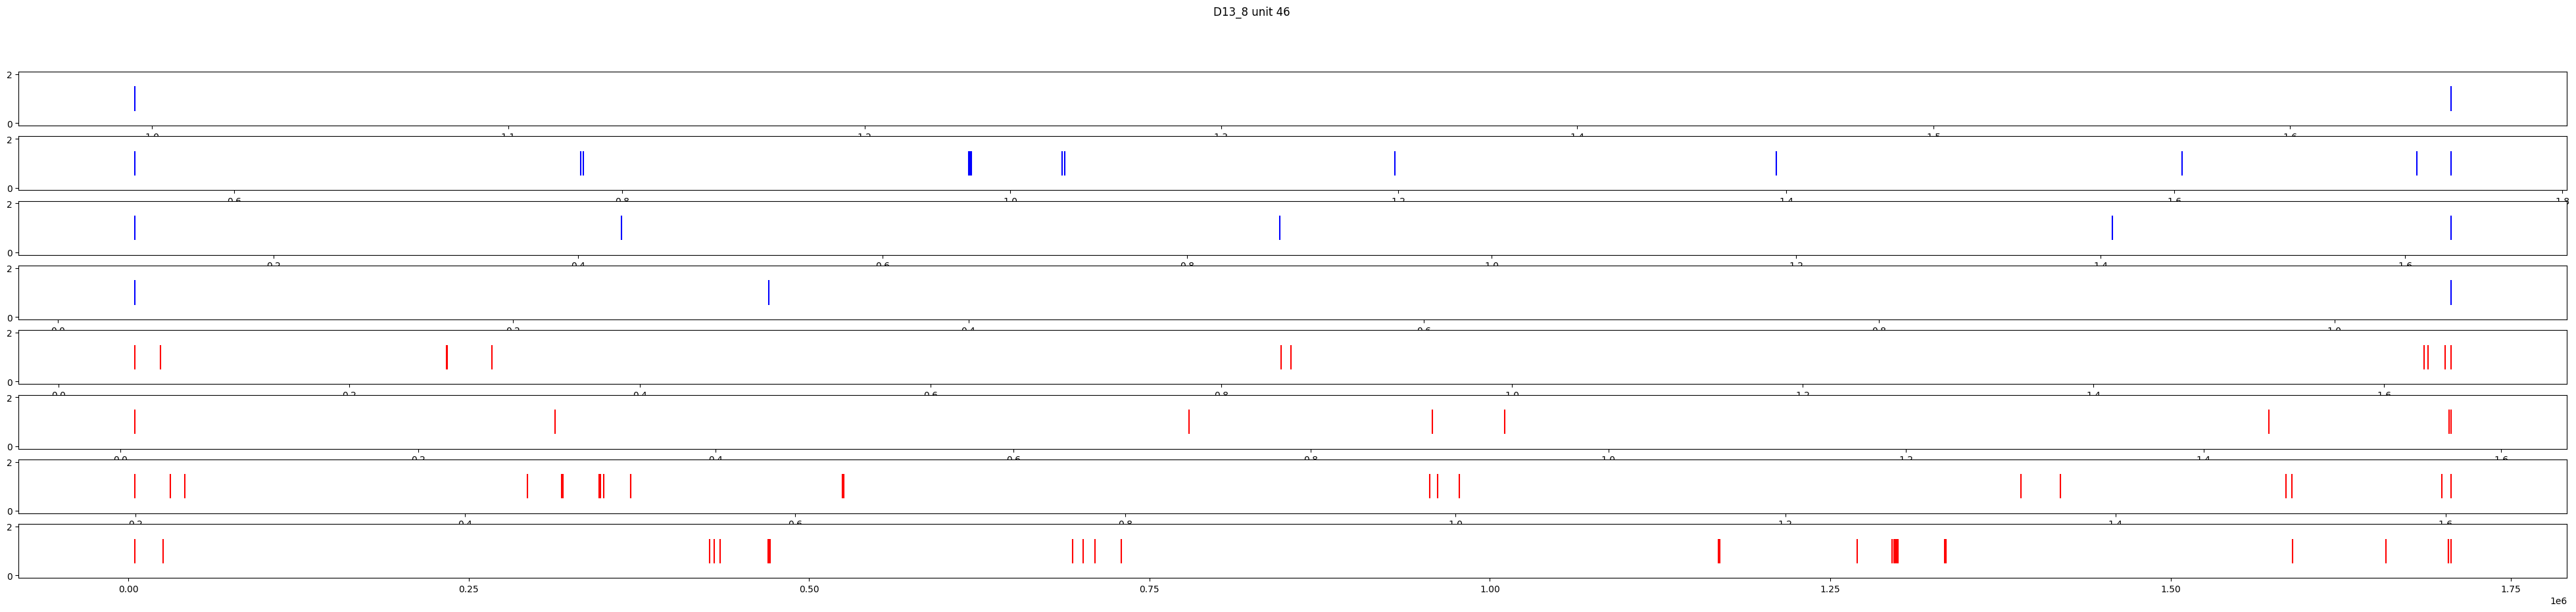

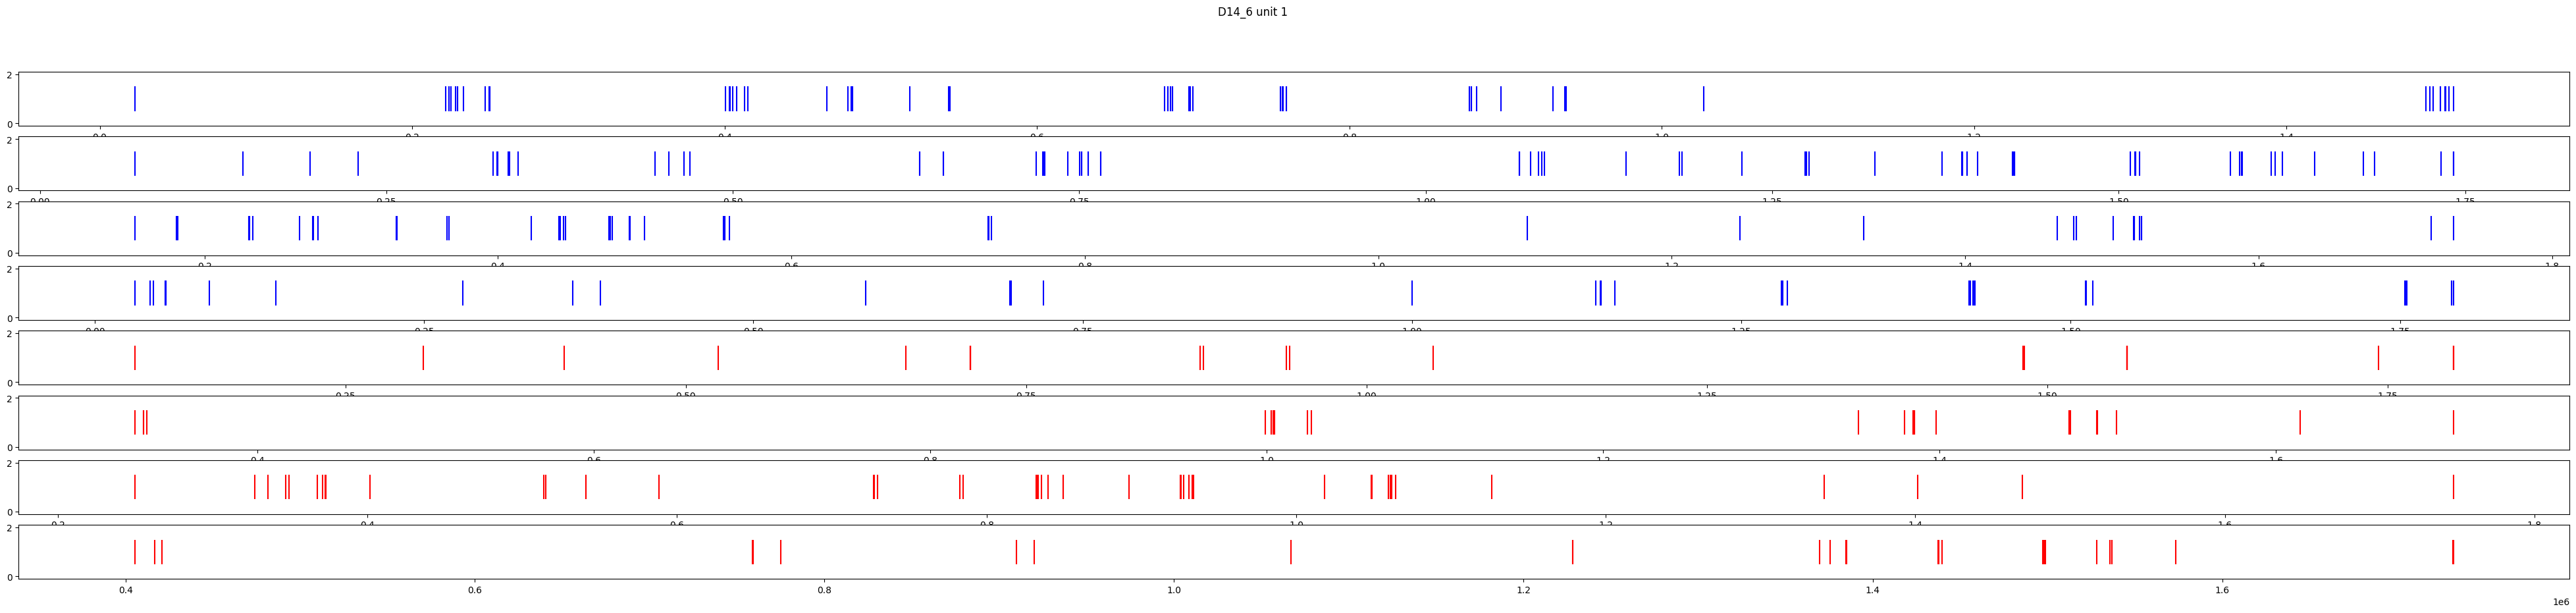

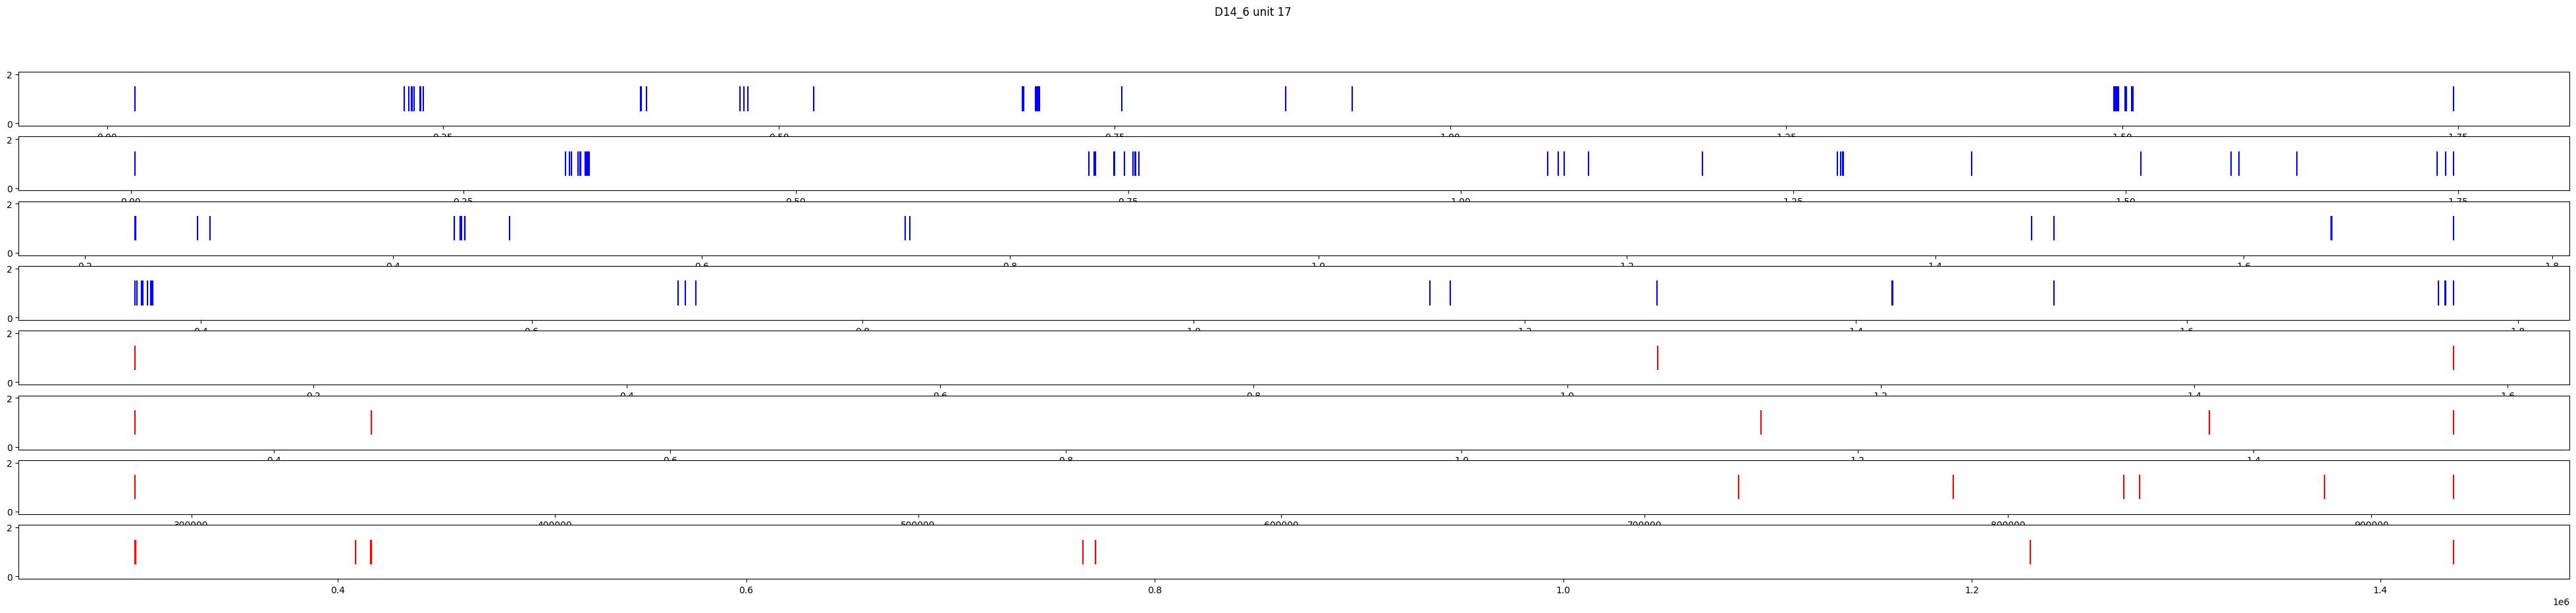

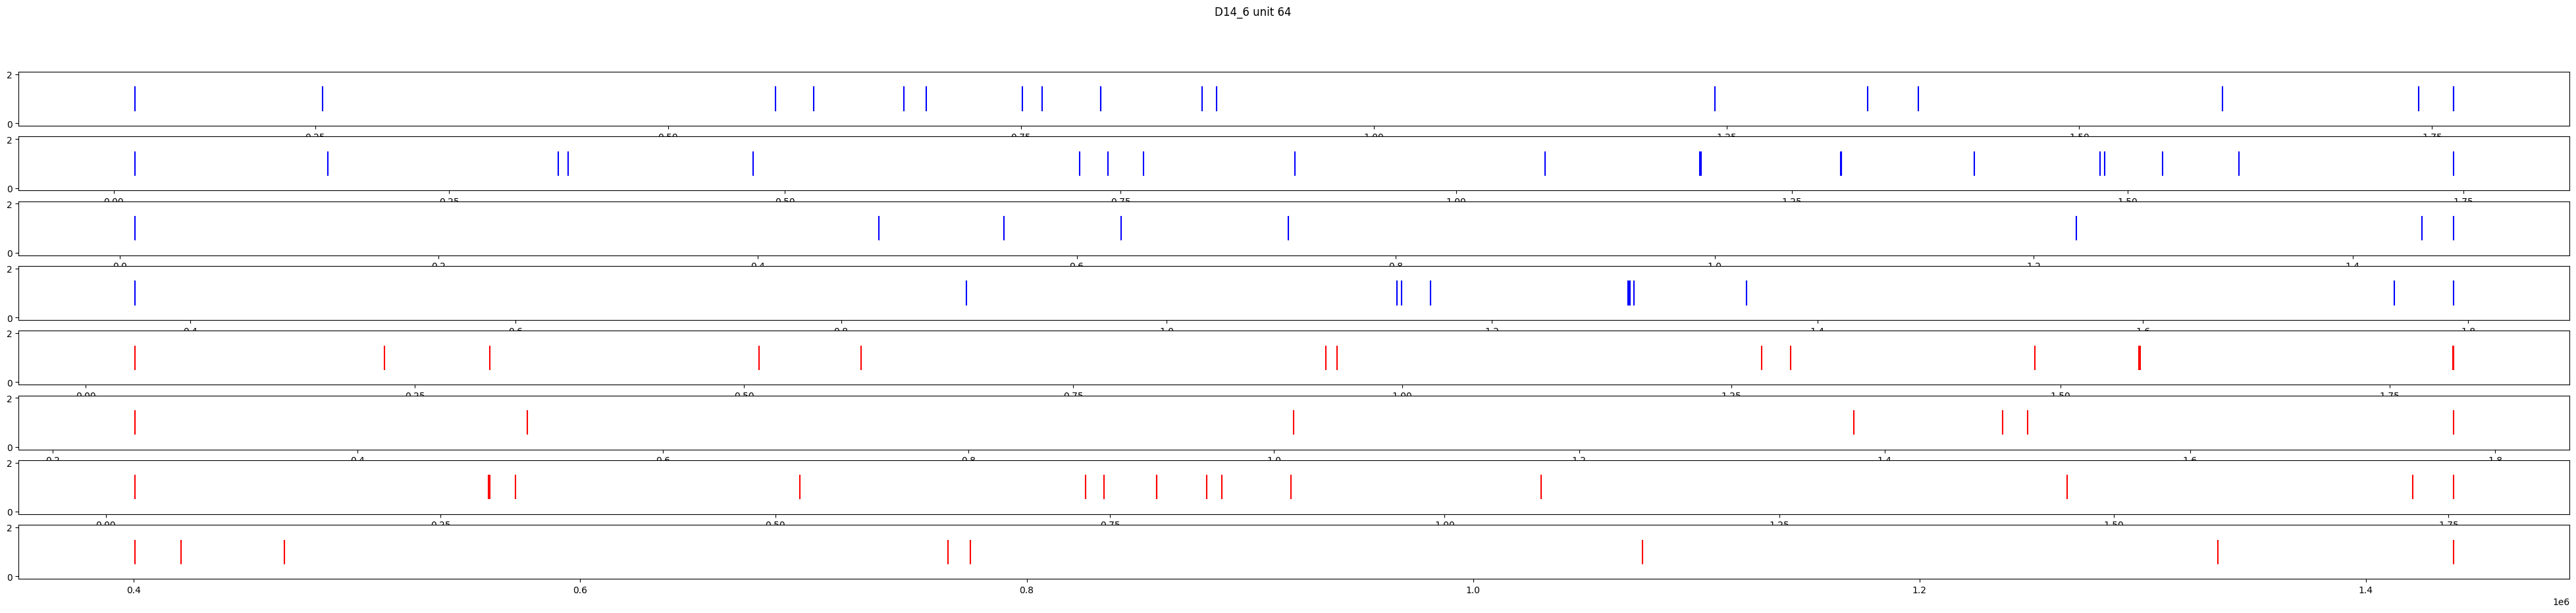

In [2]:
# Figure 6l
import numpy as np
import matplotlib.pyplot as plt
import os

# Load raster data
# Set source data directory
source_data_dir = "../Source data/Figure 6"
os.makedirs(source_data_dir, exist_ok=True)

# Define `.npz` storage path
npz_file_path = os.path.join(source_data_dir, "raster_spike_trains.npz")
data = np.load(npz_file_path, allow_pickle=True)

unit_ids = data["unit_ids"]
subjects = data["subjects"]
spike_trains = data["spike_trains"]
segment_indices = data["segment_indices"]
conditions = data["conditions"]

# Set the output directory for reconstructed raster plots
output_folder_reconstructed = os.path.join(source_data_dir, "raster_reconstructed")
os.makedirs(output_folder_reconstructed, exist_ok=True)

# Recreate raster plots
for i, (unit_id, subject, unit_spike_train, condition) in enumerate(zip(unit_ids, subjects, spike_trains, conditions)):
    fig = plt.figure(figsize=(50, 10))

    for plot_index, (segment_spike_train, cond) in enumerate(zip(unit_spike_train, condition)):
        ax = plt.subplot(len(unit_spike_train), 1, plot_index+1)
        ax.eventplot(segment_spike_train, color="blue" if cond == "before" else "red")

    fig.suptitle(f'{subject} unit {unit_id}')
    # plt.savefig(f'{output_folder_reconstructed}/{subject}_unit_{unit_id}.pdf', transparent=True)
    plt.show()

# print(f"Reconstructed raster plots saved in {output_folder_reconstructed}")

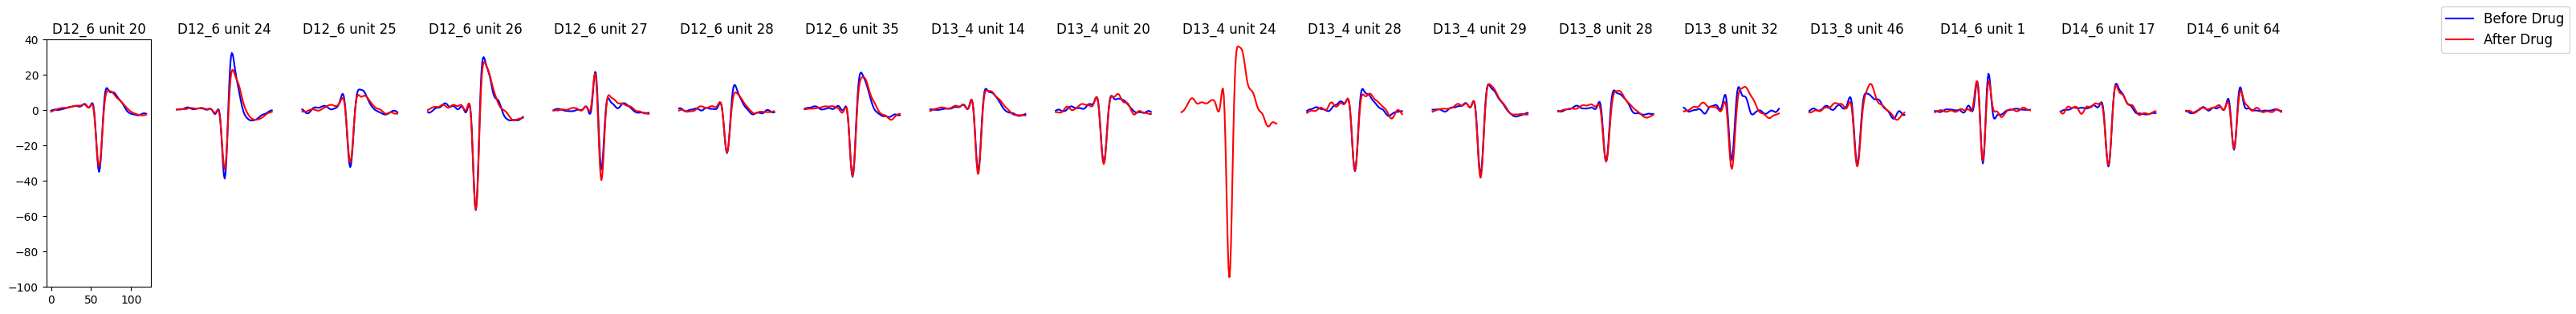

In [3]:
import matplotlib.pyplot as plt
# Set storage directory
source_data_dir = "../Source data/Figure 6"
os.makedirs(source_data_dir, exist_ok=True)

# Define the file path for storing the .npz file
npz_file_path = os.path.join(source_data_dir, "waveform_templates.npz")

# Reload the stored data
data = np.load(npz_file_path, allow_pickle=True)

# Extract stored values
unit_ids = data["unit_ids"]
subjects = data["subjects"]
templates_before = data["templates_before"]
templates_after = data["templates_after"]

# Create a figure with appropriate size
plt.figure(figsize=(len(unit_ids) * 2, 4))

# Loop through each unit and plot its waveform
for i, (unit_id, subject, template_before, template_after) in enumerate(zip(unit_ids, subjects, templates_before, templates_after), 1):
    ax = plt.subplot(1, len(unit_ids), i)  # Create a subplot for each unit
    ax.plot(template_before, color="blue", label="Before Drug" if i == 1 else "_nolegend_")  # Plot pre-drug waveform
    ax.plot(template_after, color="red", label="After Drug" if i == 1 else "_nolegend_")  # Plot post-drug waveform
    ax.set_title(f"{subject} unit {unit_id}")  # Set subplot title
    ax.set_ylim(-100, 40)  # Set y-axis limits
    if i != 1:
        ax.set_axis_off()  # Hide axis for all but the first subplot

# **Add a global legend**
plt.figlegend(["Before Drug", "After Drug"], loc="upper right", fontsize=12)

# Save and display the figure
# plt.savefig(f"{source_data_dir}/reconstructed_waveforms_with_legend.pdf")
plt.show()

/var/folders/_x/6w4dd8m135g00vqgl3ft6r4c0000gp/T/ipykernel_9911/2575028289.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='condition', y='firing rate change', ax=ax, whis=(0, 100), palette=palette)
/var/folders/_x/6w4dd8m135g00vqgl3ft6r4c0000gp/T/ipykernel_9911/2575028289.py:55: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=df, x='condition', y='firing rate change', ax=ax, whis=(0, 100), palette=palette)


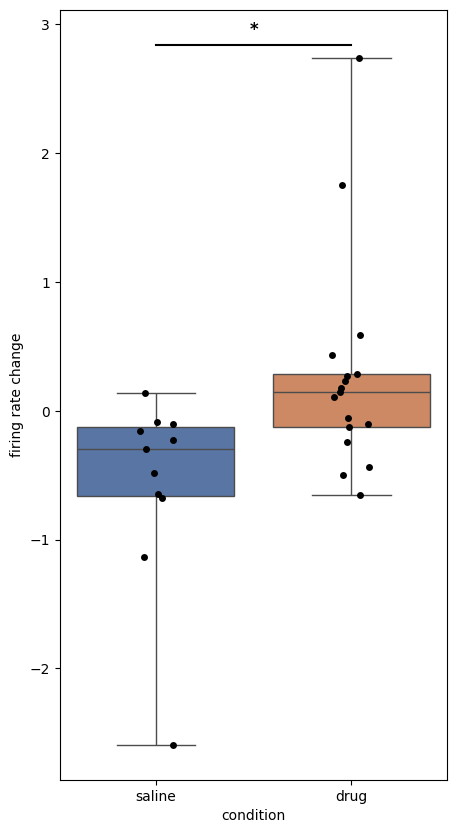

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Ensure the output directory exists


# Load the CSV files
saline_csv = f"../Source data/Figure 6/saline_firing_rate_diff.csv"
drug_csv = f"../Source data/Figure 6/drug_firing_rate_diff.csv"

saline_df = pd.read_csv(saline_csv)
drug_df = pd.read_csv(drug_csv)

# Add a column to indicate the condition
saline_df['condition'] = 'saline'
drug_df['condition'] = 'drug'

# Select and rename relevant columns
saline_df = saline_df[['condition', 'firing_rate_diff']].rename(columns={'firing_rate_diff': 'firing rate change'})
drug_df = drug_df[['condition', 'firing_rate_diff']].rename(columns={'firing_rate_diff': 'firing rate change'})

# Combine both datasets
df = pd.concat([saline_df, drug_df], ignore_index=True)

# Ensure data is numeric and remove NaNs
df['firing rate change'] = pd.to_numeric(df['firing rate change'], errors='coerce')
df = df.dropna(subset=['firing rate change'])

# Compute the t-test for statistical significance
saline_values = df[df['condition'] == 'saline']['firing rate change']
drug_values = df[df['condition'] == 'drug']['firing rate change']
t_stat, p_value = ttest_ind(saline_values, drug_values, equal_var=False, nan_policy='omit')

# Define significance level based on p-value
if p_value < 0.001:
    significance = '***'  # p < 0.001
elif p_value < 0.01:
    significance = '**'   # p < 0.01
elif p_value < 0.05:
    significance = '*'    # p < 0.05
else:
    significance = 'n.s.'  # Not significant

# Create figure
plt.figure(figsize=(5, 10))
ax = plt.gca()

# Use Seaborn's default color palette to ensure color consistency
palette = sns.color_palette("deep")

# Box plot with matching colors
sns.boxplot(data=df, x='condition', y='firing rate change', ax=ax, whis=(0, 100), palette=palette)

# Scatter plot (each point represents a unit)
sns.stripplot(data=df, x='condition', y='firing rate change', ax=ax, color='black', jitter=True, size=5)

# Annotate significance with asterisks
x1, x2 = 0, 1  # X positions for saline and drug
y, h, col = df['firing rate change'].max() + 0.1, 0.05, 'black'  # Y position
ax.plot([x1, x2], [y, y], lw=1.5, c=col)
ax.text((x1 + x2) * 0.5, y + h, significance, ha='center', va='bottom', color=col, fontsize=12, fontweight='bold')

# Save and show plot
output_file = f"./firing_rate_change_comparison.pdf"
# plt.savefig(output_file)
plt.show()
plt.close()

# print(f"Plot saved as {output_file}")